In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import joblib
from scipy import stats
from sklearn.model_selection import train_test_split,cross_val_score,cross_validate,GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [92]:
data = pd.read_csv("../data/car_price_prediction.csv")
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [94]:
data.isna().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [95]:
for col in data.select_dtypes(include='object').columns:
    print(f"{col}")
    print(data[col].unique())
    print('*'*75)

Levy
['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247' '879' '1342' '1327'
 '1598' '1514' '1058' '738' '1935' '481' '1522' '1282' '456' '880' '900'
 '798' '1277' '442' '1051' '790' '1292' '1047' '528' '1211' '1493' '1793'
 '574' '930' '1998' '271' '706' '1481' '1677' '1661' '1286' '1408' '1090'
 '595' '1451' '1267' '993' '1714' '878' '641' '749' '1511' '603' '353'
 '877' '1236' '1141' '397' '784' '1024' '1357' '13

In [96]:
data['Levy'] = data['Levy'].replace({'-':np.nan}).astype(float)
data['Leather interior'] = data['Leather interior'].replace({'Yes':1,'No':0})
data['Mileage'] = data['Mileage'].str.extract(r'([\d.]+)').astype(int)
data['Doors'] = data['Doors'].replace({'04-May':4, '02-Mar':2, '>5':5})

C:\Users\shwet\AppData\Local\Temp\ipykernel_18328\1683398185.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Leather interior'] = data['Leather interior'].replace({'Yes':1,'No':0})
C:\Users\shwet\AppData\Local\Temp\ipykernel_18328\1683398185.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Doors'] = data['Doors'].replace({'04-May':4, '02-Mar':2, '>5':5})


In [97]:
# data['Engine volume'] = data['Engine volume'].str.lower()
# data['Turbo'] = data['Engine volume'].str.contains('turbo')
data['Engine volume'] = data['Engine volume'].str.extract(r'([\d.+])').astype(float)

In [98]:
#detacting outlier 

def detect_outliers(df,features,thold):
    outlier_ind=[]
    for c in features:
        q1 = np.percentile(df[c],25)
        q3 = np.percentile(df[c],75)
        
        iqr = q3-q1
        outlier_step = iqr*thold 
        outlier_list_col = df[(df[c] < q1 - outlier_step) | (df[c] > q3 + outlier_step)].index
        outlier_ind.extend(outlier_list_col)
    return outlier_ind


In [99]:
features =[ 'Price','Levy','Mileage']
outliers = detect_outliers(data,features,1.5)
deleted_df = data.drop(data.loc[outliers].index,axis=0)

C:\Users\shwet\AppData\Local\Temp\ipykernel_18328\1917128211.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_cars.index,y=top10_cars.values,palette='viridis')


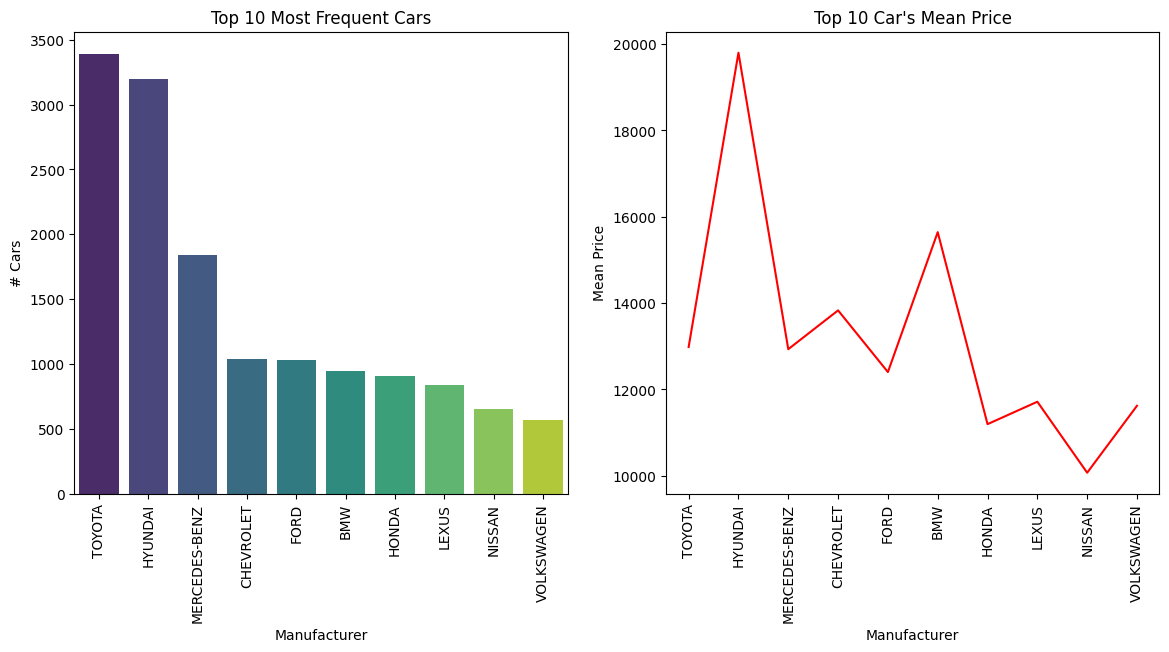

In [100]:
top10_cars = deleted_df['Manufacturer'].value_counts().sort_values(ascending=False)[:10]
top10_mean_price = [deleted_df[deleted_df['Manufacturer']==i]['Price'].mean() for i in list(top10_cars.index)]

fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(121)
sns.barplot(x=top10_cars.index,y=top10_cars.values,palette='viridis')
plt.xticks(rotation=90)
plt.ylabel("# Cars")
plt.title('Top 10 Most Frequent Cars')


ax2 = fig.add_subplot(122)
sns.lineplot(x=top10_cars.index,y=top10_mean_price,color='r')
plt.xticks(rotation=90)
plt.ylabel('Mean Price')
plt.title("Top 10 Car's Mean Price")
plt.show()

In [101]:
deleted_df.groupby('Doors')['Drive wheels'].value_counts(normalize=True)*100

Doors  Drive wheels
2      Rear            46.334716
       Front           39.419087
       4x4             14.246196
4      Front           69.067162
       4x4             20.609910
       Rear            10.322929
5      Front           47.787611
       Rear            26.548673
       4x4             25.663717
Name: proportion, dtype: float64

In [102]:
deleted_df.groupby('Gear box type')['Price'].median().sort_values(ascending=False)

Gear box type
Tiptronic    17876.0
Variator     13172.0
Automatic    11563.0
Manual        8781.0
Name: Price, dtype: float64

In [103]:
deleted_df.groupby('Color')['Price'].mean().sort_values(ascending=False)

Color
Yellow           16165.645833
Grey             15511.388683
White            14855.971142
Brown            14810.414201
Carnelian red    14742.733728
Orange           14695.240506
Beige            14418.140625
Black            14270.543848
Sky blue         13961.554622
Silver           13956.965266
Golden           13623.264286
Blue             12751.590000
Red              12338.672078
Green             9117.311475
Pink              8967.560000
Purple            8837.384615
Name: Price, dtype: float64

In [104]:
deleted_df.groupby('Wheel')['Price'].mean().sort_values(ascending=False)

Wheel
Left wheel          14720.121833
Right-hand drive     8754.951503
Name: Price, dtype: float64

In [105]:
deleted_df.groupby('Fuel type')['Price'].mean().sort_values(ascending=False)

Fuel type
Plug-in Hybrid    22510.023810
Hydrogen          20385.000000
Diesel            20117.796719
LPG               13916.412975
Petrol            13567.058855
Hybrid            10397.230269
CNG                8588.345416
Name: Price, dtype: float64

In [106]:
deleted_df['Fuel type'].value_counts()

Fuel type
Petrol            9362
Diesel            3596
Hybrid            3383
LPG                632
CNG                469
Plug-in Hybrid      84
Hydrogen             1
Name: count, dtype: int64

In [107]:
deleted_df = deleted_df.drop('ID',axis=1)

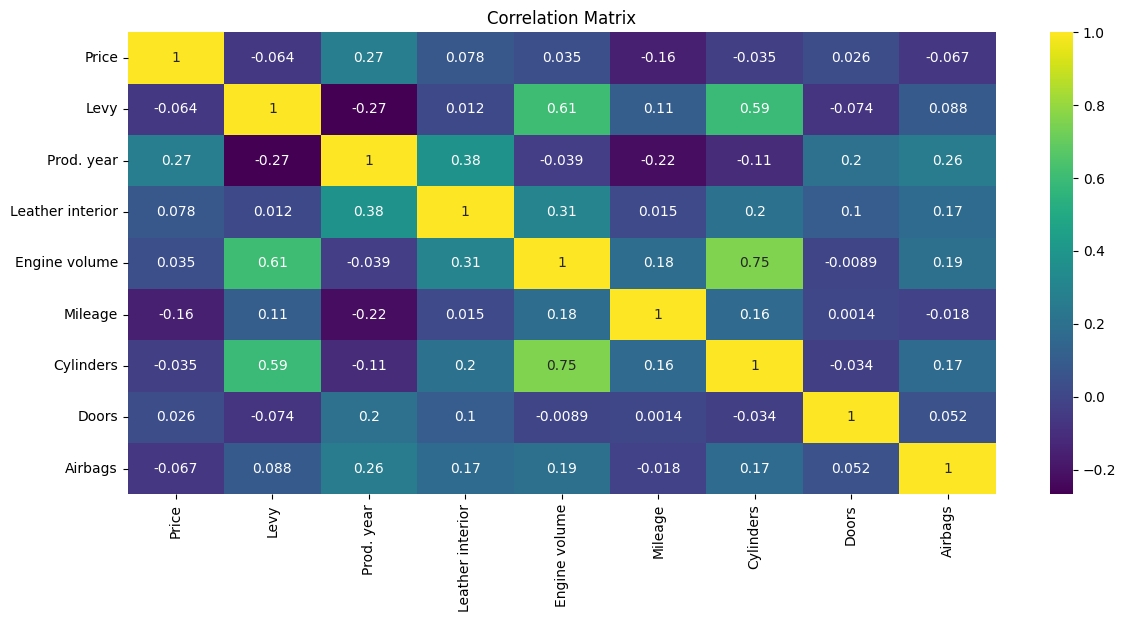

In [108]:
plt.figure(figsize=(14,6))
sns.heatmap(deleted_df.select_dtypes(include=[int,float]).corr(),annot=True,cmap='viridis')
plt.title("Correlation Matrix")
plt.show()

In [109]:
data.select_dtypes(include=object).columns

Index(['Manufacturer', 'Model', 'Category', 'Fuel type', 'Gear box type',
       'Drive wheels', 'Wheel', 'Color'],
      dtype='object')

In [110]:
num_feat = ['Levy', 'Prod. year','Engine volume', 'Leather interior','Mileage', 'Cylinders', 'Doors', 'Airbags']
cat_feat = ['Manufacturer', 'Model' ,'Category', 'Fuel type', 'Gear box type',
       'Drive wheels', 'Wheel', 'Color']

In [111]:
num_df = deleted_df[num_feat]
y = deleted_df['Price']
cat_df = deleted_df[cat_feat]

In [112]:
Imputer = SimpleImputer(strategy='median')
Imputer.fit(num_df)
display(Imputer.statistics_)
num_df = Imputer.transform(num_df)

array([7.79000e+02, 2.01200e+03, 2.00000e+00, 1.00000e+00, 1.26265e+05,
       4.00000e+00, 4.00000e+00, 6.00000e+00])

In [113]:
scaler = StandardScaler()
num_df = scaler.fit_transform(num_df)

In [114]:
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler())
])

In [115]:
pipeline = ColumnTransformer([
    ('num',num_pipeline,num_feat),
    ('cat',OneHotEncoder(),cat_feat)
])

cars_data = pipeline.fit_transform(deleted_df)

In [116]:
X_train,X_test,y_train,y_test = train_test_split(cars_data,y,test_size=0.3,random_state=42)

In [117]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [118]:
predictions = lr_model.predict(X_test)
mae = mean_absolute_error(y_test,predictions)
print(f"Mean Absolute Error: {mae}")
mse = mean_squared_error(y_test,predictions)
print(f"Mean Squared Error: {mse}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 6646.007131468524
Mean Squared Error: 77473338.45903681
Root Mean Squared Error: 8801.894026801096


In [119]:
#Decision Tree
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train,y_train)
predictions = dt_model.predict(X_test)
mae = mean_absolute_error(y_test,predictions)
print(f"Decision Tree Mean Absolute Error: {mae}")
mse = mean_squared_error(y_test,predictions)
print(f"Decision Tree Mean Squared Error: {mse}")
rmse = np.sqrt(mse)
print(f"Decision Tree Root Mean Squared Error: {rmse}")

Decision Tree Mean Absolute Error: 4030.8002351085347
Decision Tree Mean Squared Error: 52846298.54508808
Decision Tree Root Mean Squared Error: 7269.545965539257


In [120]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)
predictions = rf_model.predict(X_test)
mae = mean_absolute_error(y_test,predictions)
print(f"RandomForest Mean Absolute Error: {mae}")
mse = mean_squared_error(y_test,predictions)
print(f"RandomForest Mean Squared Error: {mse}")
rmse = np.sqrt(mse)
print(f"RandomForest Root Mean Squared Error: {rmse}")

RandomForest Mean Absolute Error: 3404.5927256585546
RandomForest Mean Squared Error: 33936911.38371077
RandomForest Root Mean Squared Error: 5825.53957876099


In [121]:
# HyperParameter Tuning
param_grid = [
    {'n_estimators':[100,200],
     'max_features':[35,33,31],
    }
]

rf = RandomForestRegressor(random_state=42)
grid_model = GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,scoring='neg_mean_squared_error')
grid_model.fit(X_train,y_train)

,estimator,RandomForestR...ndom_state=42)
,param_grid,"[{'max_features': [35, 33, ...], 'n_estimators': [100, 200]}]"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [122]:
cvres = grid_model.cv_results_
for mean_score,params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_score),params)


6124.02374760299 {'max_features': 35, 'n_estimators': 100}
6110.231683544313 {'max_features': 35, 'n_estimators': 200}
6141.866884995976 {'max_features': 33, 'n_estimators': 100}
6122.395932288309 {'max_features': 33, 'n_estimators': 200}
6156.204031115897 {'max_features': 31, 'n_estimators': 100}
6135.254582359852 {'max_features': 31, 'n_estimators': 200}


In [123]:
feat_imp = grid_model.best_estimator_.feature_importances_
cat_encoder = pipeline.named_transformers_['cat']
cat_one_hot_feat = [i for cat in cat_encoder.categories_ for i in cat]
total_features = num_feat + cat_one_hot_feat
sorted(zip(feat_imp,total_features),reverse=True)

[(np.float64(0.117241359544173), 'Mileage'),
 (np.float64(0.11572455919724436), 'Prod. year'),
 (np.float64(0.08075670238403108), 'Levy'),
 (np.float64(0.0805527276665665), 'Airbags'),
 (np.float64(0.027856476121397734), 'Tiptronic'),
 (np.float64(0.02657807731870391), 'Diesel'),
 (np.float64(0.02510729621894793), 'Automatic'),
 (np.float64(0.0244046665208259), 'Engine volume'),
 (np.float64(0.018300399302877145), 'Leather interior'),
 (np.float64(0.016889853495338687), 'Jeep'),
 (np.float64(0.01634782610472708), 'HYUNDAI'),
 (np.float64(0.016048312568899256), 'Cylinders'),
 (np.float64(0.015065017459995927), 'SSANGYONG'),
 (np.float64(0.014628623372882324), 'Sedan'),
 (np.float64(0.01441140715314101), 'Petrol'),
 (np.float64(0.014184581979142984), 'Hybrid'),
 (np.float64(0.012668756422921945), 'Black'),
 (np.float64(0.01161329048546936), 'White'),
 (np.float64(0.010672876953125295), 'H1'),
 (np.float64(0.010617170337368458), 'Santa FE'),
 (np.float64(0.010368772205490866), 'Silver'),


In [ ]:
final_model = grid_model.best_estimator_
final_predictions = final_model.predict(X_test)
final_mse = mean_squared_error(y_test,predictions)
final_rmse = np.sqrt(final_mse)
print(f"Reduced Root Mean Square Error: {final_rmse}")

Reduced Root Mean Square Error: 5825.53957876099


In [126]:
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([5786.83085307, 6269.85131951])

In [131]:
# joblib.dump(final_model,'model.pkl')

In [132]:
# full_pipeline = Pipeline([
#     ('pipe',pipeline),
#     ('final_model',grid_model.best_estimator_)
# ])

# test_df = pd.DataFrame([{"Levy":1399.0,"Manufacturer": "LEXUS","Model" :"RX 450", 
#                          "Prod. year" : 2010,"Category" : "Jeep","Leather interior": 1,"Fuel type" : "Hybrid",
#                          "Engine volume" : 3.0,"Mileage" : 186005,"Cylinders" :6.0,"Gear box type": "Automatic","Drive wheels" :"4x4","Doors":4,
#                          "Wheel" : "Left wheel","Color" :  "Silver","Airbags" :1}])

# prediction = full_pipeline.predict(test_df)
# print(prediction)
